In [1]:
%pip install pytrends

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install folium

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 93 kB 141 kB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for folium: filename=folium-0.12.1.post1-py2.py3-none-any.whl size=95017 sha256=881d93eceea4bff5f1baf9bce5db8349dc065ed09b9c0ad93134c5dfef36cbe6
  Stored in directory: /root/.cache/pip/wheels/cf/d2/b1/569dd3ad4959f691dbd11987ac20ee2d5d58cb7d9f45968cae
Successfully built folium
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note

In [4]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [5]:
pytrends = TrendReq(hl='en-US', tz=360)
crypto_list = ["cryptocurrency", "crypto"]
pytrends.build_payload(crypto_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')

df_queries = pytrends.related_queries()

top_cryptocurrency = df_queries.get("cryptocurrency").get("top")
top_crypto = df_queries.get("crypto").get("top")
df_top = pd.concat([top_cryptocurrency, top_crypto] )
df_top.sort_values(['value'], ascending = False).reset_index(drop = True)

,query,value
0,best cryptocurrency,100
1,crypto news,100
2,trading cryptocurrency,99
3,crypto,91
4,cryptocurrency news,88
5,bitboy crypto,86
6,bitboy,84
7,cryptocurrency for beginners,81
8,trading crypto,79
9,bitcoin cryptocurrency,69


In [6]:
crypto_list = ["bitboy crypto", "banter crypto", "jrny crypto", "crypto zombie"]
pytrends.build_payload(crypto_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest = pytrends.interest_over_time().drop(columns='isPartial')

In [7]:
df_interest

,bitboy crypto,banter crypto,jrny crypto,crypto zombie
date,,,,
2016-11-27,0,0,0,0
2016-12-04,0,0,0,0
2016-12-11,0,0,0,0
2016-12-18,0,0,0,0
2016-12-25,0,0,0,0
...,...,...,...,...
2021-10-17,40,38,8,2
2021-10-24,48,33,9,2
2021-10-31,61,42,9,2


Text(0.5, 1.0, 'Crypto Youtube Channels Trends Over Time')

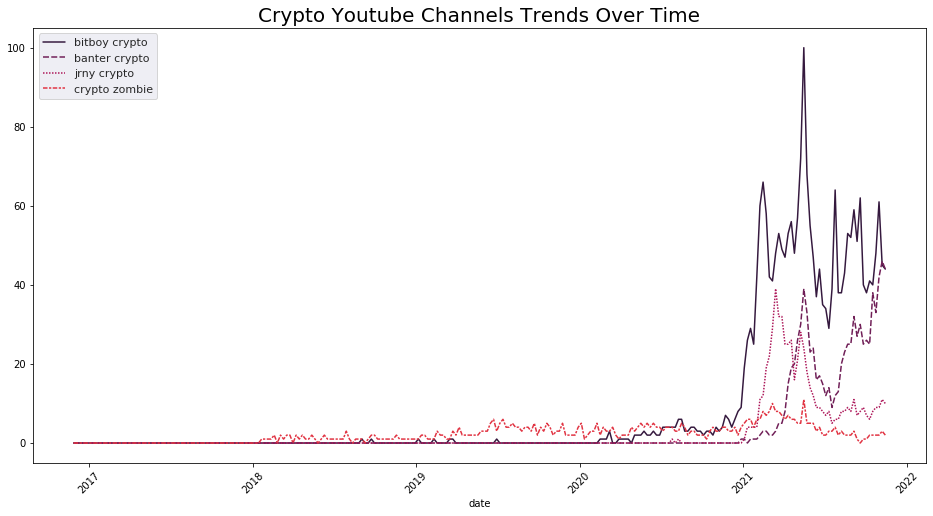

In [8]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.set(style="darkgrid", palette = 'rocket')
ax = sns.lineplot(data=df_interest)
ax.set_title('Crypto Youtube Channels Trends Over Time', fontsize=20)

In [10]:
plt.savefig('Images/Crypto Youtube Channels Trends Over Time.png')

<Figure size 432x288 with 0 Axes>

In [11]:
print(pd.__version__)


1.3.4


In [11]:
crypto_list = ["bitboy"]
pytrends.build_payload(crypto_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=False)
df = df_interest_region.sort_values(by='bitboy', ascending=False).head(10).reset_index()

In [12]:
df

,geoName,bitboy
0,Australia,100
1,Netherlands,100
2,Slovenia,92
3,Norway,72
4,Canada,66
5,Ireland,65
6,United Kingdom,65
7,Belgium,55
8,United States,52
9,New Zealand,41


Text(0, 0.5, 'Value')

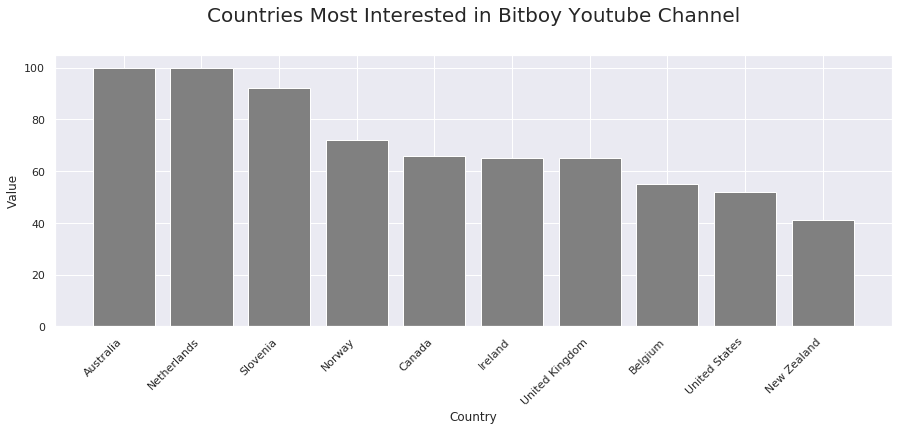

In [15]:
fig = plt.figure(figsize=(15,5))
plt.bar( df['geoName'],
         df['bitboy'], color ='grey')
plt.xticks(rotation=45,ha='right')
plt.title('Countries Most Interested in Bitboy Youtube Channel',y=1.1,fontsize=20)
plt.xlabel('Country')
plt.ylabel('Value')

In [16]:
plt.savefig('Images/Countries Most Interested in Bitboy Youtube Channel.png')

<Figure size 432x288 with 0 Axes>

In [17]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
the_map = folium.Map(tiles="cartodbpositron")
the_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=df,
    columns=['geoName', 'bitboy'],
    key_on='properties.name',
    fill_color='Blues',
    nan_fill_color='white',
    fill_opacity=0.8,
    line_opacity=0.5,
)
the_map

/opt/conda/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
